# Exploratory Data Analysis of ~20k tweets from 9/11/2016 to 12/12/2016.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import indicoio as indico
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
df = pd.read_csv('tweets.csv')

In [18]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')

In [19]:
df.columns

Index(['user id', 'name', 'handle', 'date', 'retweets', 'favorites', 'text',
       'id', 'permalink', 'language', 'followers_count', 'location',
       'sentiment'],
      dtype='object')

In [20]:
df.head()

,user id,name,handle,date,retweets,favorites,text,id,permalink,language,followers_count,location,sentiment
0,7.108627e+17,The gamer,VenkateshaPanc2,2016-11-09 23:38:24,0.0,0.0,If common man is supporting the decision why c...,7.964142e+17,https://twitter.com/VenkateshaPanc2/status/796...,en,6.0,"Indore, India",0.712256
1,7.291956e+07,Uma Kant Singh,umakantsingh_in,2016-11-09 23:38:42,0.0,0.0,"#DeMonetisation,Not govt of common man,PM who ...",7.964142e+17,https://twitter.com/umakantsingh_in/status/796...,en,455.0,New Delhi,0.433632
2,2.381901e+08,Antony bothagar,Antonybothagar,2016-11-09 23:38:46,0.0,1.0,I am already suffering to get changes for ₹ 10...,7.964142e+17,https://twitter.com/Antonybothagar/status/7964...,en,76.0,NaN,0.844959
3,2.433278e+09,Abhishek Sharma,skyneeldotcom,2016-11-09 23:38:53,1.0,1.0,#APPSC #Recruitment 2016 – Apply Online for 98...,7.964143e+17,https://twitter.com/skyneeldotcom/status/79641...,en,6288.0,NaN,0.568757
4,3.246635e+09,abdul rahman,RahmanAbdul2603,2016-11-09 23:39:21,0.0,0.0,#DeMonetisation almst everybody knows fr a mar...,7.964144e+17,https://twitter.com/RahmanAbdul2603/status/796...,en,48.0,"Saharanpur, India",0.080881


## Q1. What was the most retweeted tweet in the last 1 month?

In [10]:
df.loc[df['retweets'].argmax()]['text']

'A total of 11 bank officers died of stress since Govt rolled out #demonetisation, says union representing 2.5L bank officers'

## A. 'A total of 11 bank officers died of stress since Govt rolled out #demonetisation, says union representing 2.5L bank officers', tweeted by the Indian Express

## Q2. The most favourited tweet?

In [24]:
df.loc[df['favorites'].argmax()]['text']

"Ahmedabad's @modibhatiakisor dares @AmitShah to come A'bad w/o security & face anger of people on #DeMonetisation. pic.twitter.com/40bLWEHRmu"

## A. "Ahmedabad's @modibhatiakisor dares @AmitShah to come A'bad w/o security & face anger of people on #DeMonetisation. pic.twitter.com/40bLWEHRmu" by Mitesh Patel.

In [31]:
## so what are all locations we have?
df['location'].unique().tolist()

['Indore, India',
 'New Delhi',
 nan,
 'Saharanpur, India',
 'UniVersAl zO)o, Neptune, MW',
 'Pune, India',
 'Asangaon, Maharashtra',
 'Lisbon, Portugal',
 'Hyderabad',
 'औकात ',
 'Gurugram, India',
 'India',
 'Leamington Spa, England',
 'Bengaluru, India',
 'Hyderabad, India',
 'United States',
 'Bhubaneswar, Odisha, India',
 'Chennai',
 'Fort Area, Mumbai',
 'Chandigarh, India',
 'Agartala, India',
 'Guwahati, India',
 'भारत',
 'Mumbai, India',
 'Bengaluru, Karnataka',
 'Bengaluru South, India',
 'Tweet',
 'Ghaziabad, India',
 'Konnagar',
 'Madras',
 'Chicago',
 'Chennai, India',
 'Mumbai',
 'Nagpur, India',
 'Laniakea SuperCluster',
 'Nowhere',
 'Planet Earth',
 'unknown,i keep moving around.',
 'lucknow, india',
 'New Delhi, India',
 'Ahmedabad / Bengaluru',
 'new delhi',
 'Siliguri, India (भारत)',
 'Bharatvarsh',
 'Bangalore',
 'Gurugram',
 'Parliament Street, New Delhi',
 '।।  वसूधेव कुटूम्बकम्  ।।',
 'Delhi/khammam India',
 'Lucknow, India',
 'SHAH RUKH ka DIL',
 'punjab',
 'IND

## Q. What was the average sentiment over the weeks? 

In [50]:
## Get average sentiment for each week. For that, return Dataframes for each week.  
def search(df, *words):  #1
    return df[np.logical_or.reduce([df['date'].str.contains(word) for word in words])]
week1 = search(df,"2016-11-09","2016-11-10","2016-11-11","2016-11-12","2016-11-13","2016-11-14","2016-11-15","2016-11-16")

In [63]:
mean_week1 = week1['sentiment'].mean()
print(mean_week1)

0.518630985332


In [49]:
week2 = search(df,"2016-11-17","2016-11-18","2016-11-19","2016-11-20","2016-11-21","2016-11-22","2016-11-23","2016-11-24")

In [53]:
mean_week2 = week2['sentiment'].mean()
print(mean_week2)

0.500702125


In [54]:
week3 = search(df,"2016-11-25","2016-11-26","2016-11-27","2016-11-28","2016-11-29","2016-11-30","2016-12-01","2016-12-02")

In [57]:
mean_week3 = week3['sentiment'].mean()
print(mean_week3)

0.485989555681


In [58]:
week4 = search(df,"2016-12-03","2016-12-04","2016-12-05","2016-12-06","2016-12-07","2016-12-08","2016-12-09","2016-12-10")

In [59]:
mean_week4 = week4['sentiment'].mean()

In [60]:
print(mean_week4)

0.480144121168


In [61]:
week5 = search(df,"2016-12-11","2016-12-12")
mean_week5 = week5['sentiment'].mean()

In [62]:
print(mean_week5)

0.480395044395


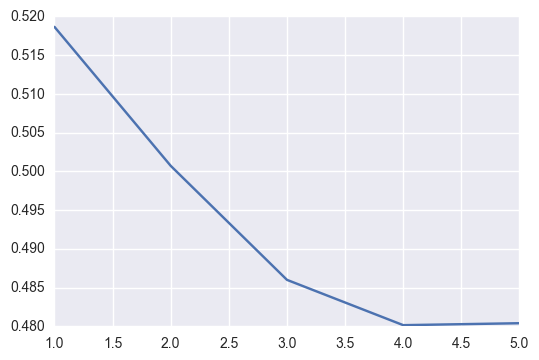

In [67]:
week_data = [mean_week1,mean_week2,mean_week3,mean_week4,mean_week5]
plt.plot([1,2,3,4,5],week_data)
plt.show()

In [ ]:
sns.set(style="ticks")
